In [1]:
!pip install pandas numpy matplotlib

In [2]:
import os
os.listdir("../data")

['tsp_10cities.csv', 'tsp_10cities_coords.csv']

In [7]:
import sys
sys.path.append("../src")
from vns import vns
from utils import tour_cost
from instance import load_instance
import importlib
import neighborhoods
importlib.reload(neighborhoods)

<module 'neighborhoods' from 'c:\\Users\\MSI\\Documents\\AMINA\\VNS\\notebooks\\../src\\neighborhoods.py'>

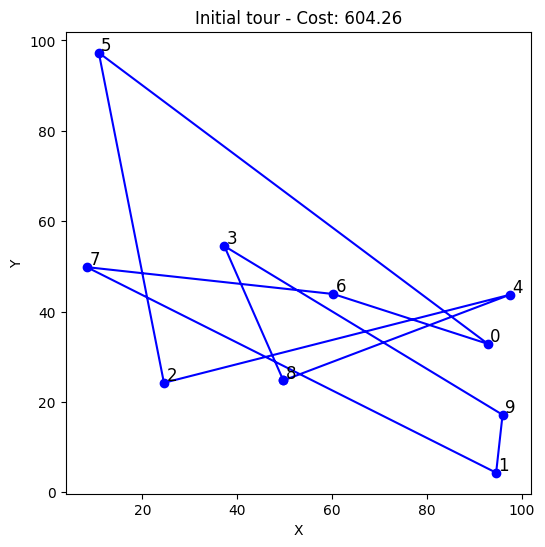

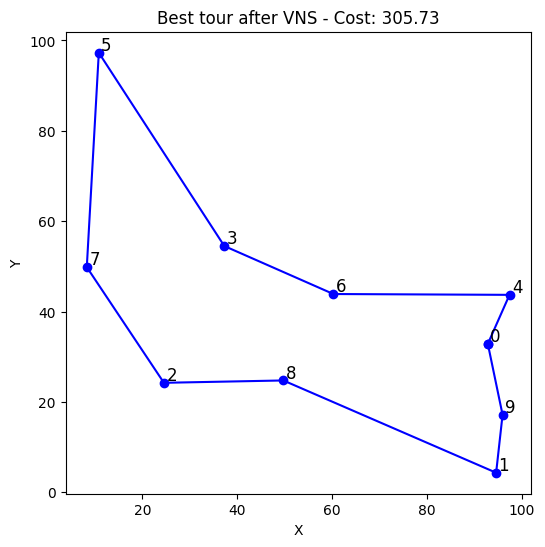

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# -------------------------
# Charger les données
# -------------------------
coords = pd.read_csv("../data/tsp_10cities_coords.csv", index_col=0).values
distance_matrix = pd.read_csv("../data/tsp_10cities.csv", index_col=0).values
n = len(coords)

# -------------------------
# Solution initiale aléatoire
# -------------------------
initial_solution = np.random.permutation(n)

# -------------------------
# Afficher le tour initial
# -------------------------
def plot_tour(solution, coords, title="Tour"):
    tour_coords = coords[solution]
    # Ajouter la première ville à la fin pour boucler le tour
    tour_coords = np.vstack([tour_coords, tour_coords[0]])
    plt.figure(figsize=(6,6))
    plt.plot(tour_coords[:,0], tour_coords[:,1], 'o-', color='blue')
    for i, (x,y) in enumerate(tour_coords[:-1]):
        plt.text(x+0.5, y+0.5, str(solution[i]), fontsize=12)
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

plot_tour(initial_solution, coords, title=f"Initial tour - Cost: {tour_cost(initial_solution, distance_matrix):.2f}")

# -------------------------
# Exécuter VNS
# -------------------------
best_solution = vns(initial_solution, distance_matrix, max_iter=100)

# -------------------------
# Afficher le tour final après VNS
# -------------------------
plot_tour(best_solution, coords, title=f"Best tour after VNS - Cost: {tour_cost(best_solution, distance_matrix):.2f}")

